# Task 1.

Try to run cellurar automatons from cellpylib. Display results for non-trivial automata (30, 45, 106, 154) and compute complexity.

In [62]:
import cellpylib as cpl
import numpy as np

# starting condition - one point
one_point = np.zeros(128)[None, :].astype(int)
one_point[:, 64] = 1

# starting condition - two points
two_points = np.zeros(128)[None, :].astype(int)
two_points[:, [32, 96]] = 1

# starting condition - random points
random = np.zeros(128)[None, :].astype(int)
random[:, np.random.randint(0, 128, 128)] = 1

In [63]:
def show_simple_results(rule):
    for start_state in [one_point, two_points, random]:

        cellular_automaton = cpl.evolve(
            start_state,
            timesteps=200,
            memoize=True,
            apply_rule=lambda n, c, t: cpl.nks_rule(n, rule),
        )

        # average entropy
        H = cpl.average_cell_entropy(cellular_automaton)

        # average mutual information
        I = cpl.average_mutual_information(cellular_automaton)

        # LMC (1 is the maximum H)
        LMC = H * (1.0 - H)

        print(f"H  : {H}")
        print(f"I  : {I}")
        print(f"LMC: {LMC}")

        cpl.plot(cellular_automaton)

### Rule 30

H  : 0.9734841793299066
I  : 0.015962992521325492
LMC: 0.02581273192428484


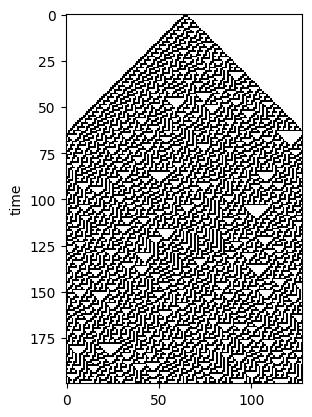

H  : 0.988664600681556
I  : 0.008363988317559266
LMC: 0.011206908040735382


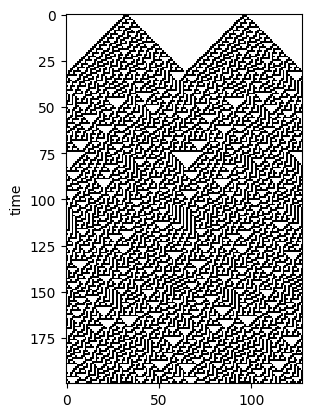

H  : 0.995530605932627
I  : 0.003362981279497206
LMC: 0.004449418584043543


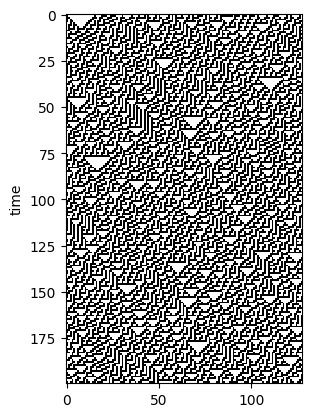

In [64]:
show_simple_results(30)

We can see high entropy values and chaotic patterns. There's a lot of information in the data but the complexity is low.

### Rule 45

H  : 0.9975542051995029
I  : 0.044590016396177434
LMC: 0.0024398128882909755


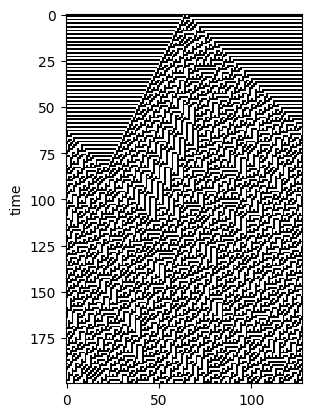

H  : 0.9967147965996187
I  : 0.012055913749236247
LMC: 0.0032744108389994213


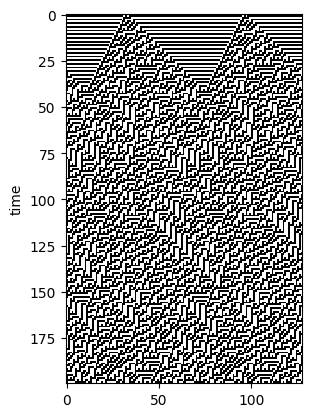

H  : 0.9967051206826565
I  : 0.003732044592384626
LMC: 0.003284023087627655


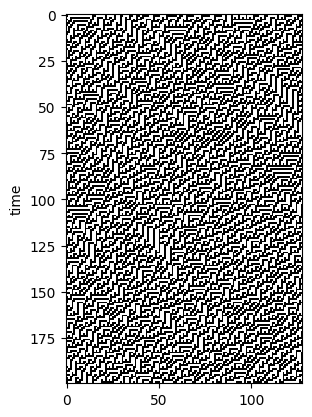

In [65]:
show_simple_results(45)

Just like before the information value is high but the complexity is not.

### Rule 106

H  : 0.06531506683748498
I  : 9.766890688984097e-05
LMC: 0.06104900888149985


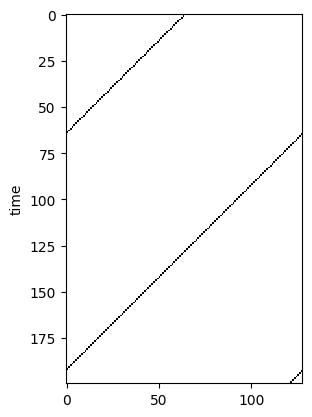

H  : 0.11599568915468228
I  : 0.00036097281694141663
LMC: 0.1025406892522126


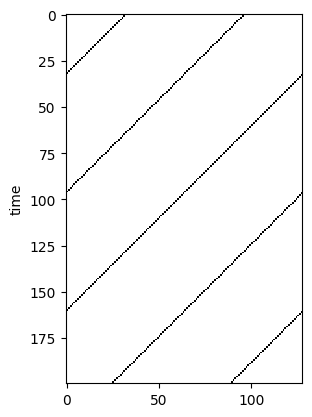

H  : 0.9970029263988083
I  : 0.004002021592159727
LMC: 0.002988091151020764


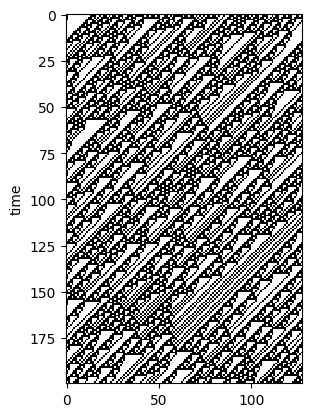

In [66]:
show_simple_results(106)

For two points, created lines never meet and chaotic patterns do not form.
It is clear that the ruleset only creates chaotic patterns only if there are more than 2 positive values in the input. 
It's curious that LMC value is high for one starting point.

### Rule 164

H  : 0.0
I  : 0.0
LMC: 0.0


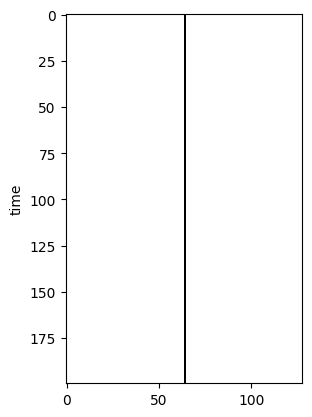

H  : 0.0
I  : 0.0
LMC: 0.0


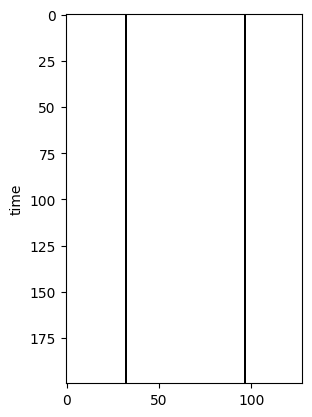

H  : 0.08952585820889045
I  : 0.03184375146699475
LMC: 0.08151097892085209


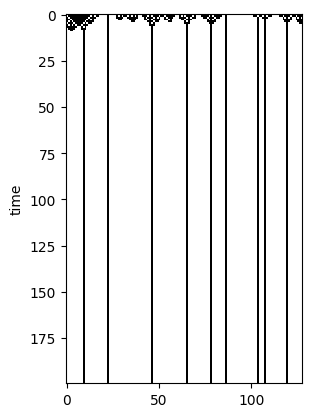

In [67]:
show_simple_results(164)

We have a very poor amount of information as the values quickly fall down to a steady state. The complexity is also low.

---

### Additional observations

After running some experiments with input patterns I noticed that all possible combinations stablize after a short while. At most at half of the input size.

H  : 0.44905788411636466
I  : 0.32991370060478475
LMC: 0.24740490082929828


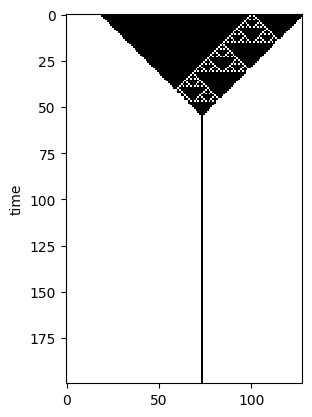

In [68]:
two_points = np.ones(128)[None, :].astype(int)
two_points[:, 1:18] = 0
two_points[:, 100] = 0

cellular_automaton = cpl.evolve(
    two_points,
    timesteps=200,
    memoize=True,
    apply_rule=lambda n, c, t: cpl.nks_rule(n, 164),
)

# average entropy
H = cpl.average_cell_entropy(cellular_automaton)

# average mutual information
I = cpl.average_mutual_information(cellular_automaton)

# LMC (1 is the maximum H)
LMC = H * (1.0 - H)

print(f"H  : {H}")
print(f"I  : {I}")
print(f"LMC: {LMC}")

cpl.plot(cellular_automaton)

### edge of chaos

find a complex value for edge of chaos. Search through different numbers of states and radius.

In [87]:
import pandas as pd

states = [2, 3, 4]
radius = [1, 2, 3]

df = pd.DataFrame(columns=["n_states"] + [f"r {r}" for r in radius])
for k in states:

    tmp_dict = {"n_states": k}
    for r in radius:

        start_state = cpl.init_random(256, k=k)

        rules, actual_lambda, _ = cpl.random_rule_table(
            lambda_val=0.55, k=k, r=r, strong_quiescence=True, isotropic=False
        )

        cellular_automaton = cpl.evolve(
            start_state,
            timesteps=200,
            memoize=True,
            apply_rule=lambda n, c, t: cpl.table_rule(n, rules),
            r=r,
        )

        # average entropy
        H = cpl.average_cell_entropy(cellular_automaton)

        # average mutual information
        I = cpl.average_mutual_information(cellular_automaton)

        # LMC (1 is the maximum H)
        LMC = H * (np.log2(k) - H)

        tmp_dict[f"r {r}"] = LMC

        print(f"H  : {H}")
        print(f"I  : {I}")
        print(f"LMC: {LMC}")
        print("===========")
    df.loc[len(df)] = tmp_dict

df.set_index("n_states")

H  : 0.017774305471523505
I  : 0.003243629983271442
LMC: 0.017458379536528474
H  : 0.8960005981047916
I  : 0.009787841861938176
LMC: 0.09318352630064733
H  : 0.9941951447241926
I  : 0.005122451099966604
LMC: 0.005771158931034361
H  : 0.07186788093766945
I  : 0.02166634743975695
LMC: 0.10874290398202785
H  : 1.4662899862152379
I  : 0.025213382035191412
LMC: 0.17400831965901042
H  : 1.54231920265859
I  : 0.017918891932543677
LMC: 0.06576957746658965
H  : 1.4882540396221011
I  : 0.14194717771843013
LMC: 0.7616079927926998
H  : 1.8239678217812454
I  : 0.04905563569298608
LMC: 0.32107702866906984
H  : 1.8521481553484578
I  : 0.03508577811784676
LMC: 0.27384352133622064


,r 1,r 2,r 3
n_states,,,
2,0.017458,0.093184,0.005771
3,0.108743,0.174008,0.065770
4,0.761608,0.321077,0.273844


Plot the last cellurar automaton for 4 states and radius of 3 (7 input elements)

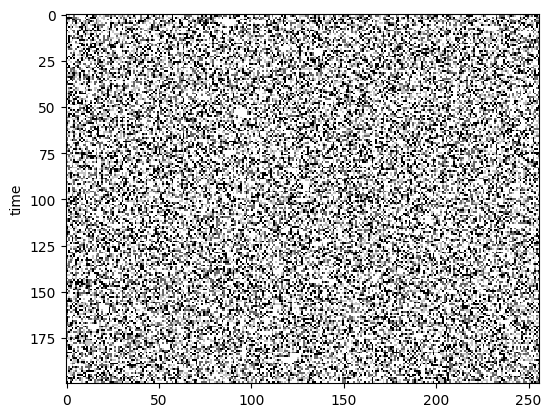

In [88]:
cpl.plot(cellular_automaton)

While doing this task I noticed a bug in cellpylib and opened an [issue](https://github.com/lantunes/cellpylib/issues/36) in the repository.

It turns out the entropy computation for higher numbers of states is bugged.

Let's try to plot the system of the highest complexity (k=4,r=1)

H  : 0.8179066028470688
I  : 0.5170489566231896
LMC: 0.9668419947133048


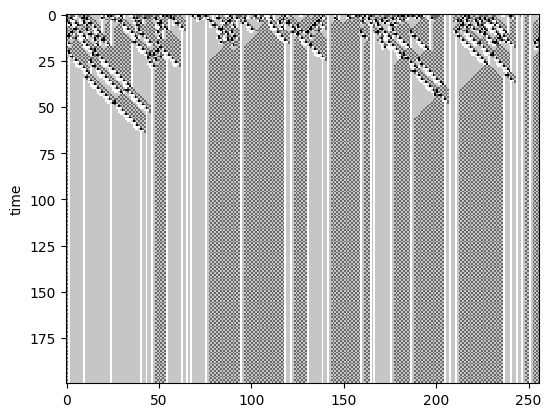

In [104]:
start_state = cpl.init_random(256, k=4)

rules, actual_lambda, _ = cpl.random_rule_table(
    lambda_val=0.55, k=4, r=1, strong_quiescence=True, isotropic=False
)

cellular_automaton = cpl.evolve(
    start_state,
    timesteps=200,
    memoize=True,
    apply_rule=lambda n, c, t: cpl.table_rule(n, rules),
    r=1,
)

# average entropy
H = cpl.average_cell_entropy(cellular_automaton)

# average mutual information
I = cpl.average_mutual_information(cellular_automaton)

# LMC (1 is the maximum H)
LMC = H * (np.log2(4) - H)

print(f"H  : {H}")
print(f"I  : {I}")
print(f"LMC: {LMC}")

cpl.plot(cellular_automaton)

We managed to find a high complexity automaton! Note that the scores here are different than in the table as the ruleset is randomly generated again